In [1]:
import os

import sys
caffe_root = '../../caffe/'
assert os.path.exists(caffe_root)
sys.path.insert(0, caffe_root + 'python')

import tempfile

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import caffe

In [4]:
# select gpu mode
caffe.set_device(0)
caffe.set_mode_gpu()

In [5]:
!pwd

/home/cudacaffe/data/vgg16


In [6]:
!ls 

VGG_ILSVRC_16_layers.caffemodel
VGG_ILSVRC_16_layers_deploy.prototxt
VGG_ILSVRC_16_layers_deploy_orig.prototxt
VGG_ILSVRC_16_layers_train_val.prototxt
VGG_ILSVRC_16_layers_train_val_orig.prototxt
fine-tune-vgg.ipynb
vgg16.png


# Download pretrained weights from Imagenet 2012

In [7]:
!wget http://www.robots.ox.ac.uk/~vgg/software/very_deep/caffe/VGG_ILSVRC_16_layers.caffemodel

--2016-07-29 23:21:23--  http://www.robots.ox.ac.uk/~vgg/software/very_deep/caffe/VGG_ILSVRC_16_layers.caffemodel
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553432081 (528M)
Saving to: 'VGG_ILSVRC_16_layers.caffemodel.1'

 1% [                                       ] 6,057,936   35.6KB/s  eta 2h 47m ^C


# Setup and load the network into a caffe::Net object

In [6]:
import os
weights_fn = '../../data/vgg16/VGG_ILSVRC_16_layers.caffemodel'
net_fn = '../../data/vgg16/VGG_ILSVRC_16_layers_deploy.prototxt'
assert os.path.exists(weights_fn)
assert os.path.exists(net_fn)

In [7]:
vgg16_net = caffe.Net(net_fn, weights_fn, caffe.TEST)

# Check the network Architecture

In [8]:
for k, v in vgg16_net.blobs.items():
    print(k)
    print(v.data.shape)

data
(10, 3, 224, 224)
conv1_1
(10, 64, 224, 224)
conv1_2
(10, 64, 224, 224)
pool1
(10, 64, 112, 112)
conv2_1
(10, 128, 112, 112)
conv2_2
(10, 128, 112, 112)
pool2
(10, 128, 56, 56)
conv3_1
(10, 256, 56, 56)
conv3_2
(10, 256, 56, 56)
conv3_3
(10, 256, 56, 56)
pool3
(10, 256, 28, 28)
conv4_1
(10, 512, 28, 28)
conv4_2
(10, 512, 28, 28)
conv4_3
(10, 512, 28, 28)
pool4
(10, 512, 14, 14)
conv5_1
(10, 512, 14, 14)
conv5_2
(10, 512, 14, 14)
conv5_3
(10, 512, 14, 14)
pool5
(10, 512, 7, 7)
fc6
(10, 4096)
fc7
(10, 4096)
fc8
(10, 1000)
prob
(10, 1000)


# Check the network parameters

In [9]:
for k,v in vgg16_net.params.items():
    print(k)
    print(v[0].data.shape)

conv1_1
(64, 3, 3, 3)
conv1_2
(64, 64, 3, 3)
conv2_1
(128, 64, 3, 3)
conv2_2
(128, 128, 3, 3)
conv3_1
(256, 128, 3, 3)
conv3_2
(256, 256, 3, 3)
conv3_3
(256, 256, 3, 3)
conv4_1
(512, 256, 3, 3)
conv4_2
(512, 512, 3, 3)
conv4_3
(512, 512, 3, 3)
conv5_1
(512, 512, 3, 3)
conv5_2
(512, 512, 3, 3)
conv5_3
(512, 512, 3, 3)
fc6
(4096, 25088)
fc7
(4096, 4096)
fc8
(1000, 4096)


# Viz network

In [12]:
!pwd

/home/cudacaffe/data/vgg16


In [13]:
!python ../../caffe/python/draw_net.py --rankdir TB VGG_ILSVRC_16_layers_deploy.prototxt vgg16.png

libdc1394 error: Failed to initialize libdc1394
Drawing net to vgg16.png


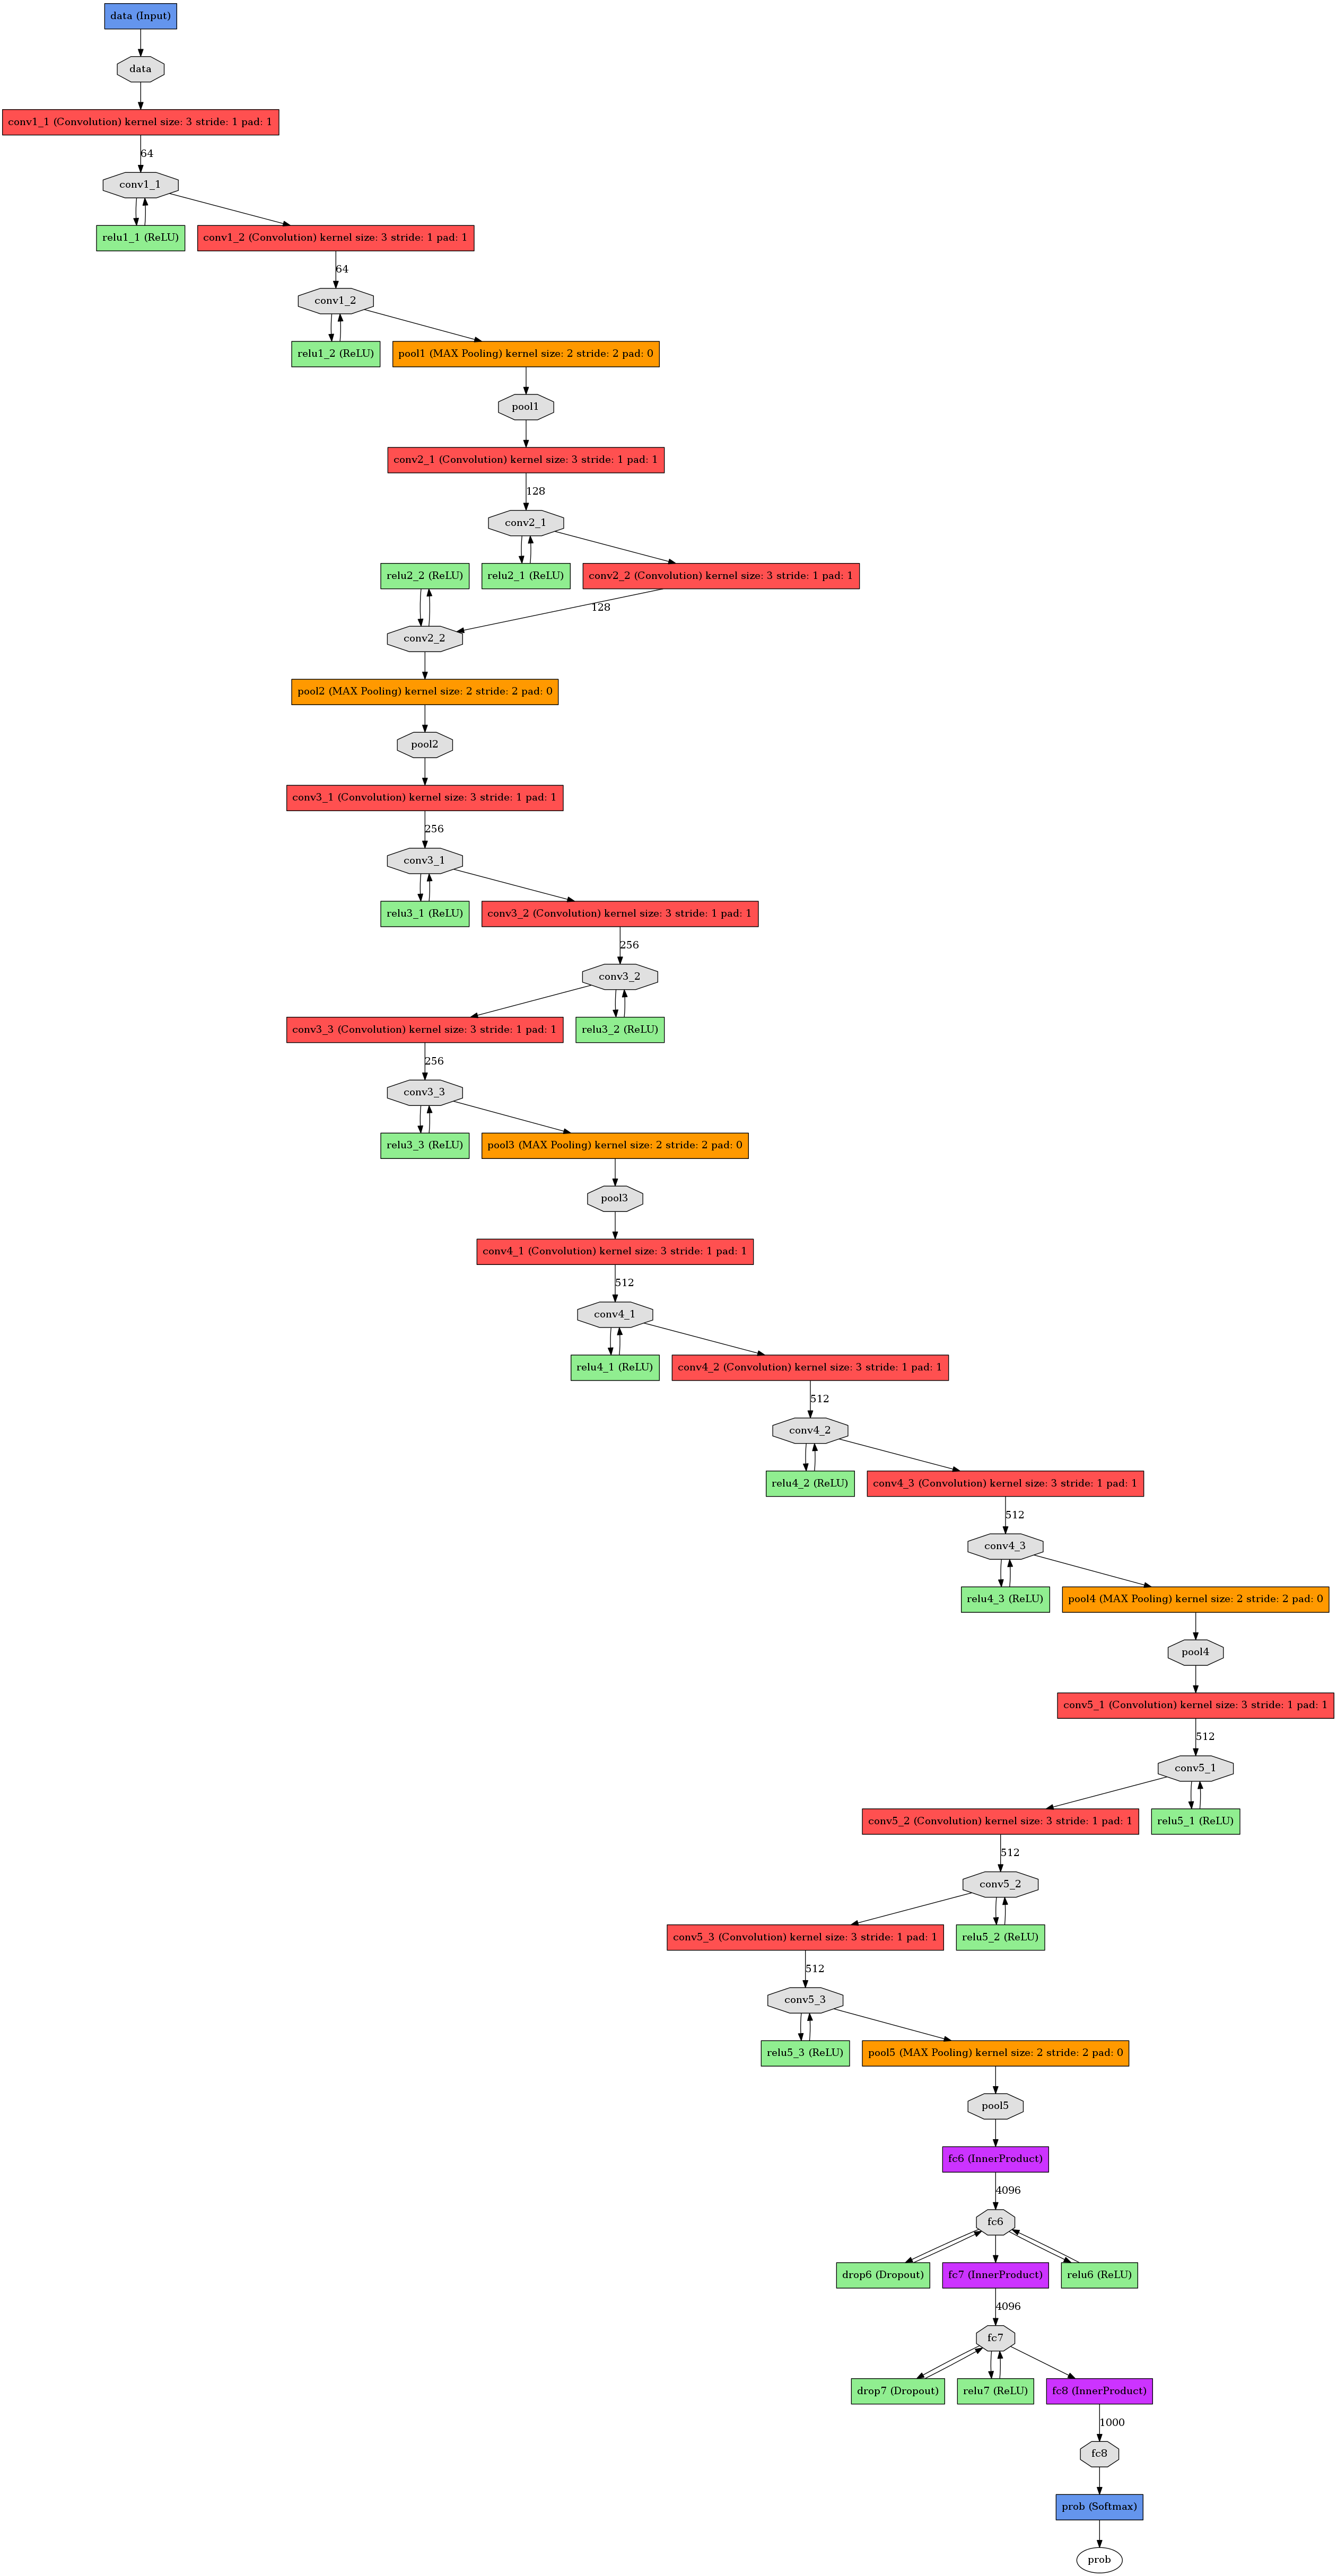

In [14]:
import IPython.display
IPython.display.Image(filename='vgg16.png')

# Fine tuning  - TODO : Manu

Notes to TODO:

* Instead of loading the _deploy.prototxt file, load _train_val.prototxt file
* In the _train_val.prototxt, change the data sources to reflect the distracted driver training and validation set
* Change the fc8 to reflect the number of classes in the distracted driver problem
* Construct the learning to specific layers, by (setting the following params prevents learning on that layer:

```
param { #weights
  lr_mult: 0
  decay_mult: 1
}
param { #bias
  lr_mult: 0
  decay_mult: 0
}
```
